![image](https://www.ewatercycle.org/assets/logo.png)

## Preprocessing of hydrological models’ input in eWaterCycle with ESMValTool


As a researcher, I want to process some forcing data retrieved from ERA5. So I can use them as input for hydrological models like lisflood, wflow, and pcrglobwb.

In [ ]:
from esmvalcore.experimental import CFG
from ewatercycle import forcing

In [2]:
# load config file
CFG.load_from_file('~/.esmvaltool/esmvaltool-config-user.yml')

## Lisflood

In [3]:
lisflood_output = forcing.generate(
    model='lisflood', 
    dataset='ERA5', 
    startyear=1990, 
    endyear=1990, 
    shapefile='Meuse/Meuse.shp',
    extract_region={
        'start_longitude': 0,
        'end_longitude': 9,
        'start_latitude': 45,
        'end_latitude': 54,
    }
)

{'auxiliary_data_dir': PosixPath('/home/sarah/temp'),
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/home/sarah/.esmvaltool/esmvaltool-config-user.yml'),
 'drs': {'CMIP5': 'default'},
 'exit_on_warning': False,
 'log_level': 'debug',
 'max_parallel_tasks': 1,
 'output_dir': PosixPath('/home/sarah/temp/esmvaltool_output'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/home/sarah/temp/esmvaltool_output/recipe_lisflood_20210420_172115/plots'),
 'preproc_dir': PosixPath('/home/sarah/temp/esmvaltool_output/recipe_lisflood_20210420_172115/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': True,
 'rootpath': {'OBS6': [PosixPath('/home/sarah/temp/ForRecipe')]},
 'run_dir': PosixPath('/home/sarah/temp/esmvaltool_output/recipe_lisflood_20210420_172115/run'),
 'save_intermediary_cubes': False,
 'work_dir': PosixPath('/home/sarah/temp/esmvaltool_output/recipe_lisflood_20210420_172115/work'),
 'write_netcdf': True,
 'write_plots': True}
Cr

In [5]:
# load and plot forcing data
data_files = list(lisflood_output.recipe_output.values())[0].data_files
data_files

(DataFile('lisflood_ERA5_Meuse_sfcWind_1990_1990.nc'),
 DataFile('lisflood_ERA5_Meuse_rsds_1990_1990.nc'),
 DataFile('lisflood_ERA5_Meuse_tasmax_1990_1990.nc'),
 DataFile('lisflood_ERA5_Meuse_tasmin_1990_1990.nc'),
 DataFile('lisflood_ERA5_Meuse_e_1990_1990.nc'),
 DataFile('lisflood_ERA5_Meuse_tas_1990_1990.nc'),
 DataFile('lisflood_ERA5_Meuse_pr_1990_1990.nc'))

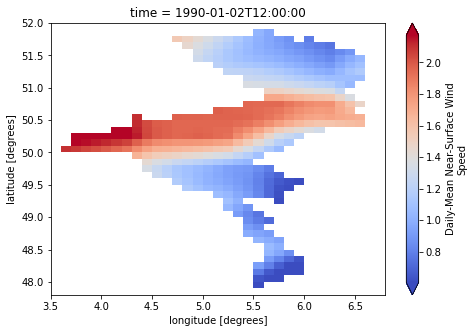

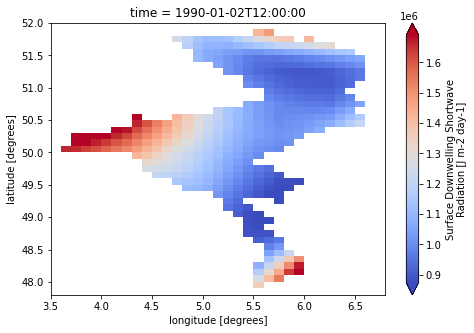

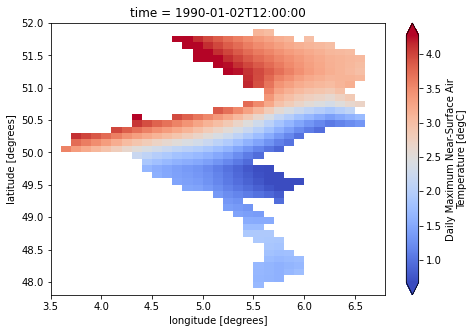

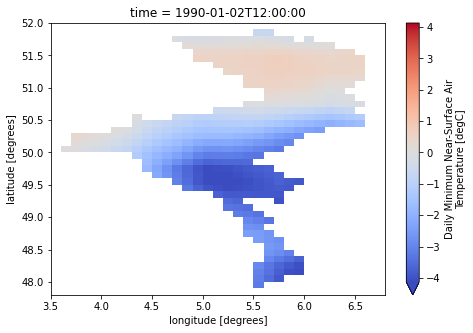

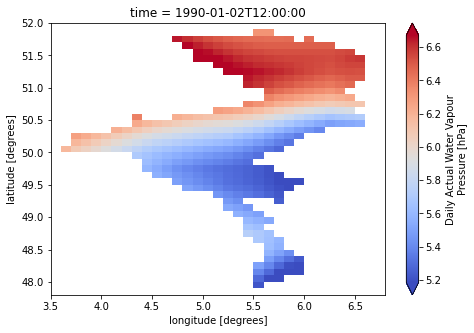

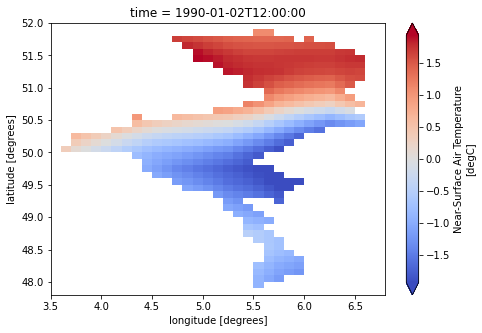

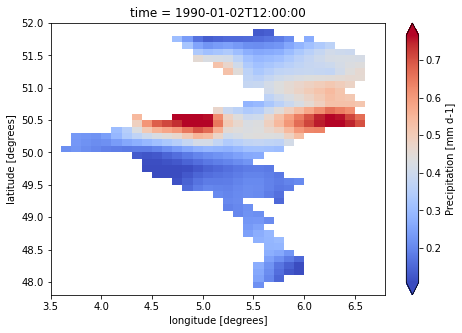

In [7]:
for data_file in data_files:
    dataset = data_file.load_xarray()
    var = list(dataset.data_vars.keys())[0]
    dataset[var].isel(time=1).plot(cmap="coolwarm", robust=True, size=5)

## Wflow

In [3]:
wflow_output = forcing.generate(
    model='wflow', 
    dataset='ERA5', 
    startyear=1990, 
    endyear=1990, 
    dem_file='wflow/wflow_dem.map',
    extract_region={
            'start_longitude': 0,
            'end_longitude': 6.75,
            'start_latitude': 47.25,
            'end_latitude': 52.5,
    },
)

{'auxiliary_data_dir': PosixPath('/home/sarah/temp'),
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/home/sarah/.esmvaltool/esmvaltool-config-user.yml'),
 'drs': {'CMIP5': 'default'},
 'exit_on_warning': False,
 'log_level': 'debug',
 'max_parallel_tasks': 1,
 'output_dir': PosixPath('/home/sarah/temp/esmvaltool_output'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/home/sarah/temp/esmvaltool_output/recipe_wflow_20210420_135342/plots'),
 'preproc_dir': PosixPath('/home/sarah/temp/esmvaltool_output/recipe_wflow_20210420_135342/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': True,
 'rootpath': {'OBS6': [PosixPath('/home/sarah/temp/ForRecipe')]},
 'run_dir': PosixPath('/home/sarah/temp/esmvaltool_output/recipe_wflow_20210420_135342/run'),
 'save_intermediary_cubes': False,
 'work_dir': PosixPath('/home/sarah/temp/esmvaltool_output/recipe_wflow_20210420_135342/work'),
 'write_netcdf': True,
 'write_plots': True}
Creating tasks

In [6]:
# load and plot forcing data
data_files = list(wflow_output.recipe_output.values())[0].data_files
data_files

(DataFile('wflow_ERA5_wflow_dem_1990_1990.nc'),)

In [7]:
for data_file in data_files:
    dataset = data_file.load_xarray()
    print(dataset)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 474, lon: 377, time: 365)
Coordinates:
  * time       (time) datetime64[ns] 1990-01-01T12:00:00 ... 1990-12-31T12:00:00
  * lat        (lat) float64 51.89 51.88 51.87 51.86 ... 47.97 47.96 47.95 47.95
  * lon        (lon) float64 3.571 3.579 3.588 3.596 ... 6.679 6.688 6.696 6.704
    height     float64 2.0
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 0.05978 0.05978 0.05978 ... 12.31 12.31
    time_bnds  (time, bnds) datetime64[ns] 1990-01-01 1990-01-02 ... 1991-01-01
    lat_bnds   (lat, bnds) float64 51.89 51.88 51.88 51.88 ... 47.95 47.95 47.94
    lon_bnds   (lon, bnds) float64 3.567 3.575 3.575 3.583 ... 6.7 6.7 6.708
    tas        (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    pet        (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.7
    provenance:   <?xml version='1.0' encoding='ASCII'?>\n<prov:document xml

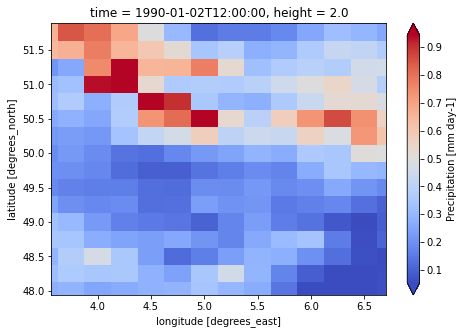

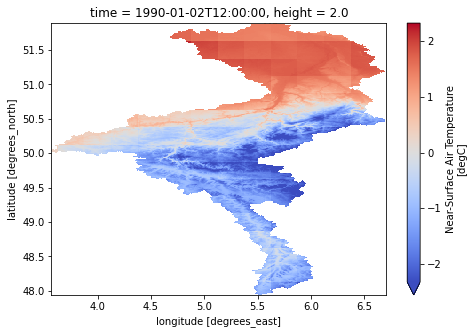

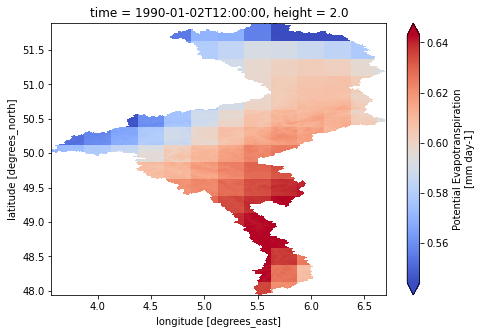

In [17]:
for var in ["pr", "tas", "pet"]:
    dataset[var].isel(time=1).plot(cmap="coolwarm", robust=True, size=5)

## Pcrglobwb

In [20]:
pcrglobwb_output = forcing.generate(
    model='pcrglobwb', 
    dataset='ERA5', 
    startyear=1990,
    endyear=1990,
    startyear_climatology=1990,
    endyear_climatology=1990,
    basin='rhine',
    extract_region={
        'start_longitude': 3,
        'end_longitude': 13.5,
        'start_latitude': 45,
        'end_latitude': 54,
    },
)

{'auxiliary_data_dir': PosixPath('/home/sarah/temp'),
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/home/sarah/.esmvaltool/esmvaltool-config-user.yml'),
 'drs': {'CMIP5': 'default'},
 'exit_on_warning': False,
 'log_level': 'debug',
 'max_parallel_tasks': 1,
 'output_dir': PosixPath('/home/sarah/temp/esmvaltool_output'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/home/sarah/temp/esmvaltool_output/recipe_pcrglobwb_20210420_141431/plots'),
 'preproc_dir': PosixPath('/home/sarah/temp/esmvaltool_output/recipe_pcrglobwb_20210420_141431/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': True,
 'rootpath': {'OBS6': [PosixPath('/home/sarah/temp/ForRecipe')]},
 'run_dir': PosixPath('/home/sarah/temp/esmvaltool_output/recipe_pcrglobwb_20210420_141431/run'),
 'save_intermediary_cubes': False,
 'work_dir': PosixPath('/home/sarah/temp/esmvaltool_output/recipe_pcrglobwb_20210420_141431/work'),
 'write_netcdf': True,
 'write_plots': True

In [22]:
# load and plot forcing data
data_files = list(pcrglobwb_output.recipe_output.values())[0].data_files
data_files

(DataFile('pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_1990-1990_rhine.nc'),
 DataFile('pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_1990-1990_rhine.nc'))

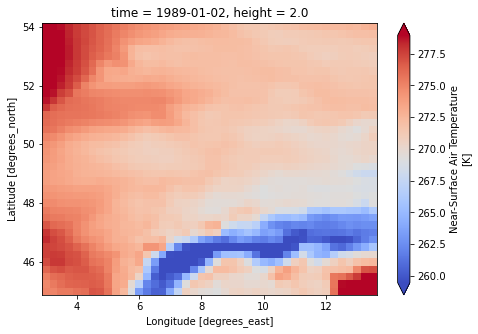

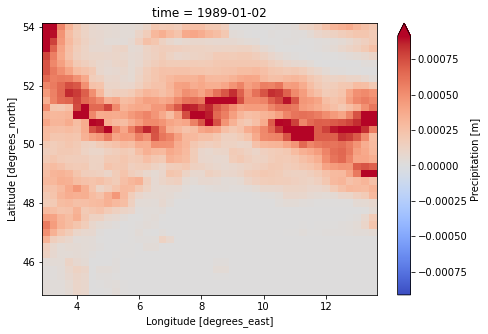

In [27]:
for var, index in zip(['tas', 'pr'], [0, 1]):
    dataset = data_files[index].load_xarray()
    dataset[var].isel(time=1).plot(cmap="coolwarm", robust=True, size=5)